In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn import metrics



In [267]:
diamonds_test = pd.read_csv("data/test.csv")
diamonds_original = pd.read_csv("data/train.csv")
diamonds = diamonds_original
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [262]:
diamonds.shape

(40455, 11)

In [158]:
diamonds.cut.unique()

array(['Premium', 'Good', 'Very Good', 'Ideal', 'Fair'], dtype=object)

In [242]:
'''
cut_dict = {"Ideal": 1,
            "Premium":2,
            "Very Good": 3,
            "Good": 4,
            "Fair":5 
           }
diamonds.cut = diamonds.cut.map(cut_dict)
diamonds_test.cut = diamonds_test.cut.map(cut_dict)
'''
diamonds = pd.get_dummies(diamonds)
diamonds_test = pd.get_dummies(diamonds_test)

In [160]:
diamonds.color.unique()

array(['G', 'H', 'J', 'F', 'E', 'I', 'D'], dtype=object)

In [161]:
cut_dict = {"D":1,
            "E":2,
            "F":3,
            "G":4,
            "H":5,
            "I":6,
            "J":7,
            "K":8,
            "L":9,
            "M":10,
           }
diamonds.color = diamonds.color.map(cut_dict)
diamonds_test.color = diamonds_test.color.map(cut_dict)


In [264]:
diamonds.sample(10)

0        6.36
1        5.31
2        7.55
3        4.27
4        6.37
         ... 
40450    5.08
40451    5.96
40452    7.51
40453    7.38
40454    6.38
Name: x, Length: 40455, dtype: float64

In [163]:
diamonds.clarity.unique()

array(['VS1', 'VS2', 'SI2', 'IF', 'SI1', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [164]:
cut_dict = {"FL":1,
            "IF": 2,
            "VVS1":3,
            "VVS2":4,
            "VS1":5,
            "VS2":6,
            "SI1":7,
            "SI2":8,
            "I1":9,
            "I2":10,
           }
diamonds.clarity = diamonds.clarity.map(cut_dict)
diamonds_test.clarity = diamonds_test.clarity.map(cut_dict)

In [206]:
diamonds.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.01,Premium,G,VS1,62.7,58.0,6.36,6.31,3.97,8.754
1,1,0.60,Good,G,VS2,64.3,57.0,5.31,5.38,3.43,7.492
2,2,1.60,Premium,H,SI2,59.4,59.0,7.55,7.60,4.50,9.010
3,3,0.30,Very Good,J,VS1,63.5,58.0,4.27,4.24,2.70,6.227
4,4,1.00,Very Good,F,SI2,62.8,57.0,6.37,6.44,4.02,8.314


In [207]:
diamonds.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [214]:
diamonds.describe()

,id,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,...,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798543,61.746491,57.455736,5.731269,5.735275,3.539063,7.785853,0.030083,0.090669,...,0.102188,0.052577,0.013917,0.032851,0.241231,0.170857,0.152466,0.227388,0.067087,0.094203
std,11678.496907,0.475739,1.437124,2.228678,1.125312,1.154908,0.711317,1.016600,0.170817,0.287141,...,0.302899,0.223190,0.117147,0.178250,0.427835,0.376388,0.359476,0.419151,0.250176,0.292115
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,5.787000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,6.851000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000,7.785000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,8.581500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40454.000000,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,9.843000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40455 non-null  int64  
 1   carat          40455 non-null  float64
 2   depth          40455 non-null  float64
 3   table          40455 non-null  float64
 4   x              40455 non-null  float64
 5   y              40455 non-null  float64
 6   z              40455 non-null  float64
 7   price          40455 non-null  float64
 8   cut_Fair       40455 non-null  uint8  
 9   cut_Good       40455 non-null  uint8  
 10  cut_Ideal      40455 non-null  uint8  
 11  cut_Premium    40455 non-null  uint8  
 12  cut_Very Good  40455 non-null  uint8  
 13  color_D        40455 non-null  uint8  
 14  color_E        40455 non-null  uint8  
 15  color_F        40455 non-null  uint8  
 16  color_G        40455 non-null  uint8  
 17  color_H        40455 non-null  uint8  
 18  color_

In [169]:
diamonds.corr()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
id,1.000000,0.005008,-0.001836,0.000801,0.002384,-0.005396,0.002846,0.007422,0.007702,0.005633,0.007602
carat,0.005008,1.000000,0.136512,0.295110,0.353316,0.029747,0.182453,0.974714,0.944353,0.948460,0.920292
cut,-0.001836,0.136512,1.000000,0.024676,0.188131,0.211912,0.438306,0.128336,0.123047,0.150653,0.090436
color,0.000801,0.295110,0.024676,1.000000,-0.023353,0.048786,0.028571,0.273433,0.264744,0.270077,0.158279
clarity,0.002384,0.353316,0.188131,-0.023353,1.000000,0.064487,0.164790,0.372429,0.356431,0.365391,0.214705
depth,-0.005396,0.029747,0.211912,0.048786,0.064487,1.000000,-0.291668,-0.023705,-0.028183,0.095489,0.003437
table,0.002846,0.182453,0.438306,0.028571,0.164790,-0.291668,1.000000,0.197420,0.184191,0.152496,0.159969
x,0.007422,0.974714,0.128336,0.273433,0.372429,-0.023705,0.197420,1.000000,0.967309,0.966396,0.957815
y,0.007702,0.944353,0.123047,0.264744,0.356431,-0.028183,0.184191,0.967309,1.000000,0.941970,0.928896
z,0.005633,0.948460,0.150653,0.270077,0.365391,0.095489,0.152496,0.966396,0.941970,1.000000,0.930774


<AxesSubplot:>

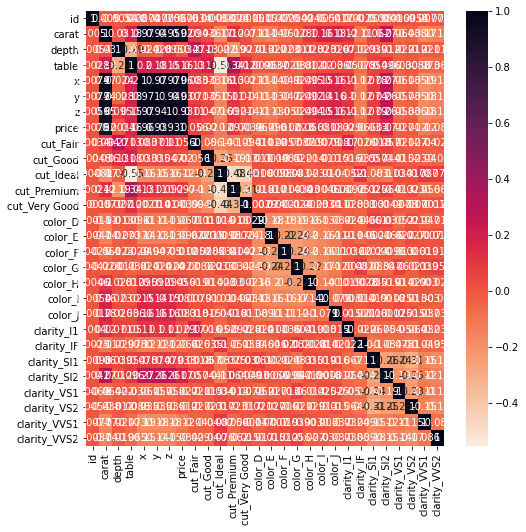

In [216]:
plt.figure(figsize=(8,8))
sns.heatmap(diamonds.corr(), annot = True, cmap="rocket_r")

In [243]:
diamonds.drop(["id","x","y","z"], axis=1,  inplace=True)
diamonds_test.drop(["id","x","y","z"], axis=1,  inplace=True)

In [244]:
diamonds

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.01,62.7,58.0,8.754,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.60,64.3,57.0,7.492,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1.60,59.4,59.0,9.010,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0.30,63.5,58.0,6.227,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
4,1.00,62.8,57.0,8.314,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40450,0.51,62.5,55.0,7.412,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40451,0.80,62.1,54.0,8.016,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
40452,1.53,58.7,59.0,9.070,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
40453,1.51,61.6,54.0,9.199,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [245]:
diamonds_test

,carat,depth,table,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.01,61.9,57.0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.49,57.5,60.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1.03,58.6,62.0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.0,56.0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.59,62.5,55.0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13480,0.41,63.8,57.0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
13481,2.05,63.5,62.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
13482,2.22,60.5,59.0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
13483,0.51,58.3,62.0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [173]:
diamonds.clarity.value_counts()

7    9759
6    9199
8    6912
5    6168
4    3811
3    2714
2    1329
9     563
Name: clarity, dtype: int64

In [174]:
diamonds.cut.value_counts()

1    16217
2    10339
3     9014
4     3668
5     1217
Name: cut, dtype: int64

In [246]:
diamond_feat = diamonds.drop('price', axis = 1)
target = diamonds.price
target

0        8.754
1        7.492
2        9.010
3        6.227
4        8.314
         ...  
40450    7.412
40451    8.016
40452    9.070
40453    9.199
40454    8.932
Name: price, Length: 40455, dtype: float64

In [247]:
LR = LinearRegression()
R = Ridge()
L = Lasso()


In [248]:
X_train, X_test, y_train, y_test = train_test_split(diamond_feat, target,test_size=0.2)
LR.fit(X_train,y_train)

LinearRegression()

In [249]:
print(LR.score(X_test,y_test))

0.8825836322436034


In [250]:
y_pred = LR.predict(X_test)

In [251]:
y_pred

array([ 7.43527172,  7.00422713,  9.94309796, ...,  6.63841312,
        7.31845107, 10.4143964 ])

In [252]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.2683003407629897
MSE: 0.12088078158628543
RMSE: 0.347679135966318


In [253]:
y_pred_test = LR.predict(diamonds_test)

In [254]:
y_pred_test

array([10.32634381,  7.37125131,  8.36761291, ..., 10.69106455,
        7.0838572 ,  7.24853954])

In [255]:
diamonds_test_original = pd.read_csv("data/test.csv")

In [256]:
diamonds_test_original["price"]  = y_pred_test

In [257]:
diamonds_test_original


,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,2.01,Ideal,H,SI1,61.9,57.0,8.14,8.05,5.01,10.326344
1,1,0.49,Good,D,VS1,57.5,60.0,5.18,5.25,3.00,7.371251
2,2,1.03,Premium,F,SI1,58.6,62.0,6.65,6.60,3.88,8.367613
3,3,0.90,Very Good,E,SI1,63.0,56.0,6.11,6.15,3.86,8.049159
4,4,0.59,Ideal,D,SI1,62.5,55.0,5.35,5.40,3.36,7.453156
...,...,...,...,...,...,...,...,...,...,...,...
13480,13480,0.41,Good,F,I1,63.8,57.0,4.72,4.69,3.00,6.252829
13481,13481,2.05,Very Good,H,VS2,63.5,62.0,8.05,7.91,5.07,10.507920
13482,13482,2.22,Premium,I,VS2,60.5,59.0,8.41,8.37,5.08,10.691065
13483,13483,0.51,Ideal,E,SI2,58.3,62.0,5.20,5.19,3.04,7.083857


In [258]:
diamonds_test_original = diamonds_test_original[["id", "price"]]
diamonds_test_original

,id,price
0,0,10.326344
1,1,7.371251
2,2,8.367613
3,3,8.049159
4,4,7.453156
...,...,...
13480,13480,6.252829
13481,13481,10.507920
13482,13482,10.691065
13483,13483,7.083857


In [265]:
diamonds_test_original.to_csv("submit.csv", index = True)
